In [ ]:
# Decision Tree Generation for Target Data Number of Checkins Based on Review Count

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
bus_file = "C:/Users/SUUSER/Google Drive/CS 210/CS 210 Project Master/Yelp Data Files/bus_ml.csv"

# Open the file for reading and read in data
bus_file_handler = open(bus_file, "r")
bus_data = pd.read_csv(bus_file_handler, sep=",")
bus_file_handler.close()

bus_data.head(3)

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Treedata = bus_data.loc[:,["review_count","Number_of_Checkins"]]
Treedata.head(5)

,review_count,Number_of_Checkins
0,4,0
1,4,0
2,3,0
3,5,9
4,5,0


In [4]:
X = bus_data.loc[:,["review_count"]]
Y = bus_data.loc[:,["Number_of_Checkins"]]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)

In [5]:
clf.predict(bus_data.loc[:,["review_count"]])

array([   6.5       ,    6.5       ,    2.23188406,   10.57575758,
         10.57575758,   66.25      ,    2.23188406,   62.85714286,
          9.54166667,    6.5       ,    2.23188406,   10.57575758,
          2.23188406,    2.23188406,   21.42857143,    6.5       ,
          2.23188406,    6.5       ,    9.54166667,  108.        ,
          9.91666667,    9.54166667,    9.54166667,    6.5       ,
         19.1       ,    2.23188406,   10.57575758,   21.42857143,
         16.14285714,    6.5       ,   16.14285714,    9.91666667,
        350.5       ,    2.23188406,    2.23188406,   66.25      ,
          2.23188406,   21.42857143,    2.23188406,  103.        ,
          9.91666667,   44.        ,   19.1       ,   21.42857143,
        183.5       ,  127.5       ,    2.23188406,   10.57575758,
          6.5       ,  460.        ,    2.23188406,  187.        ,
        130.5       ,   40.5       ,  345.5       ,   31.5       ,
          2.23188406,   28.9       ,   10.57575758,   72.25   

In [7]:
# Classifying the dataset & visualizing the resulting the decision tree

In [8]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,Y)

In [9]:
clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [10]:
with open("bus_data.dot", 'w') as f:
...     f = tree.export_graphviz(clf, out_file=f)

In [11]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("bus2.pdf")

True

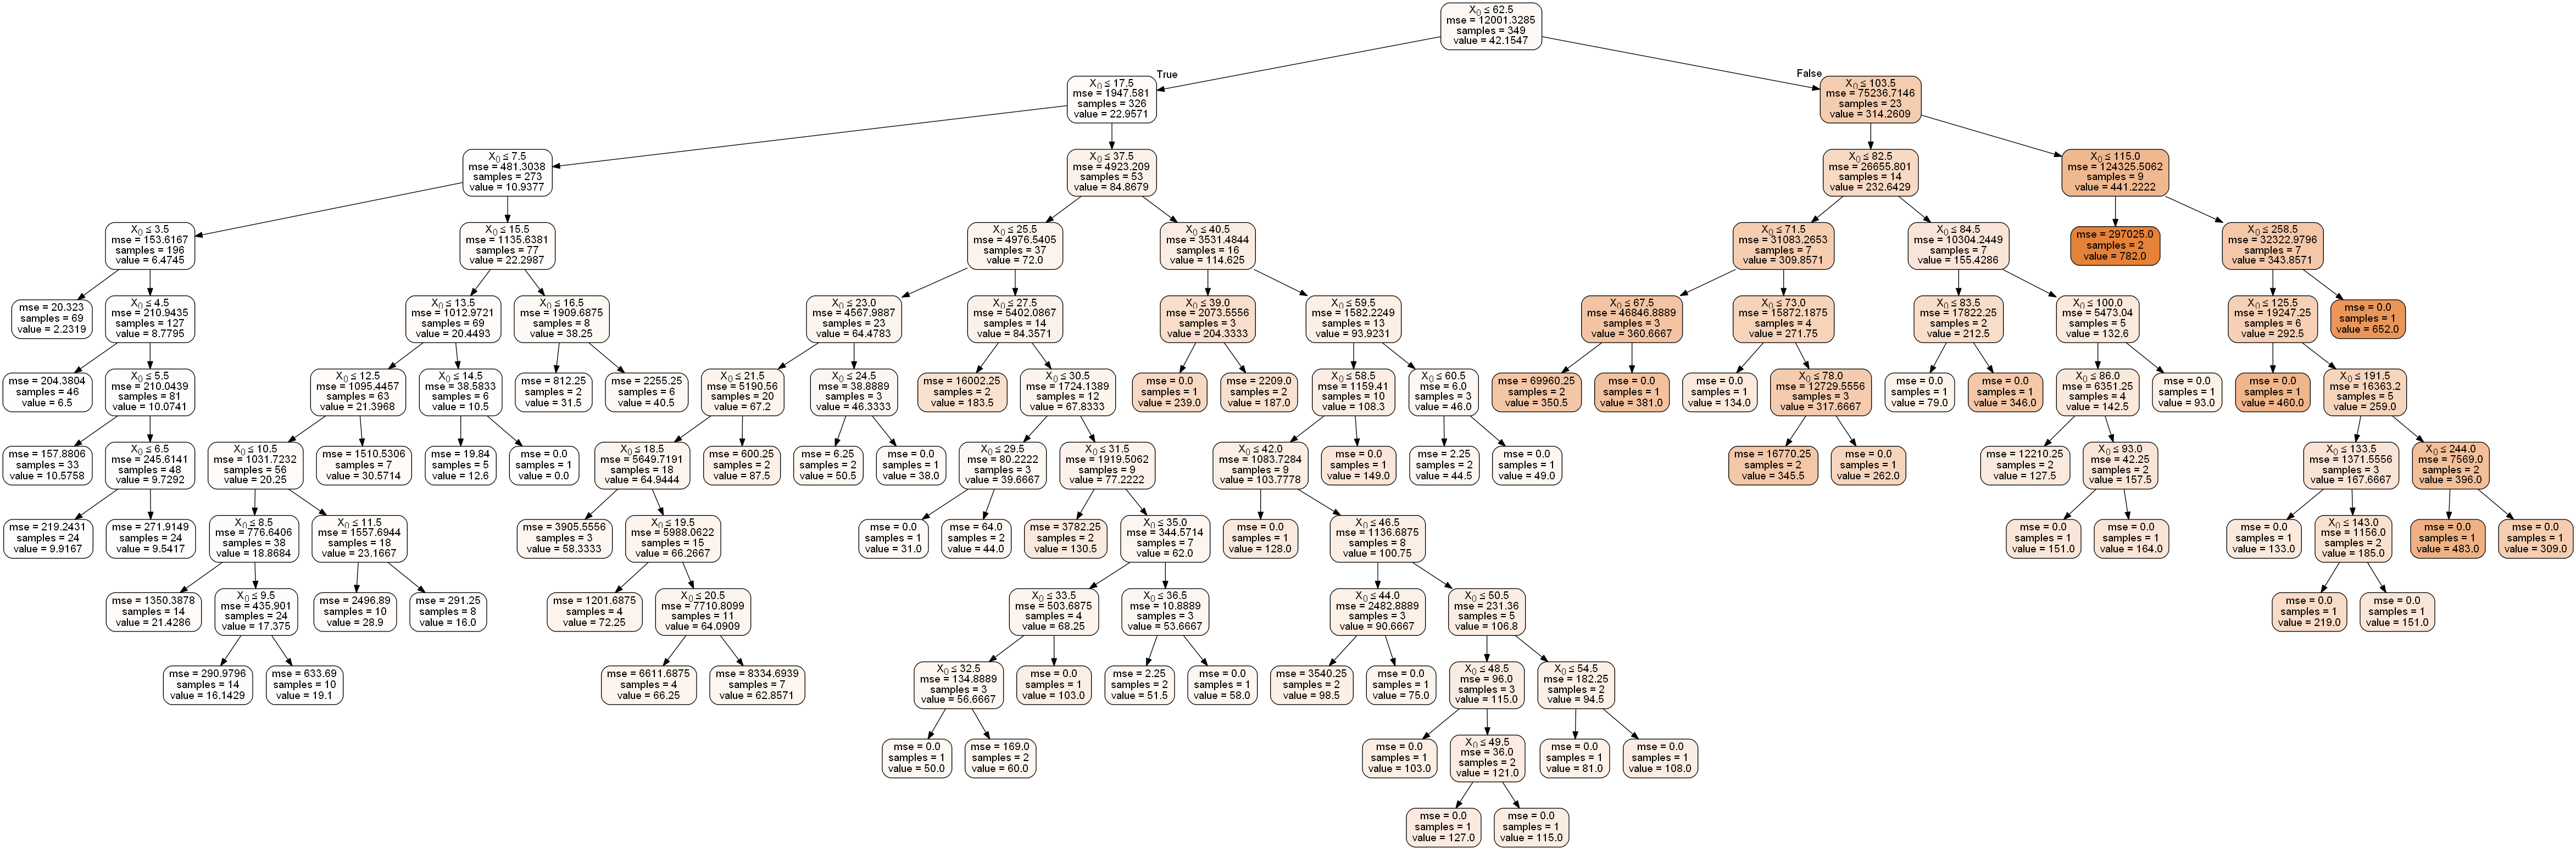

In [22]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None,  
                         class_names = bus_data.loc[:,["Number_of_Checkins"]], filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  